# Exploring Music Through the Decades
### The Tune Trackers

In this project, we will analyze the top 20 songs from each decade to uncover trends and patterns in music over time. Using Spotify's dataset, we will explore how musical characteristics have evolved across decades.

### Research Questions
1. What are the common connections between top songs across different decades?
2. How similar are the top 20 songs within a decade, and how do they vary between decades?
3. How have the dominant themes in popular music evolved over the decades?
4. Is there a relationship between musical genres and lyrical content over time?
5. How do the top songs of each decade compare in terms of mood or sentiment?

### Potential Data Sources
We plan to split up the work, listening to the top 20 songs for each decade according to these websites.
##### 80s: https://www.rollingstone.com/music/music-lists/best-80s-songs-1234876455/george-clinton-atomic-dog-1234878374/
##### 90s: https://www.rollingstone.com/music/music-lists/50-best-songs-of-the-nineties-252530/nirvana-smells-like-teen-spirit-1991-252544/ 
##### 2000s: https://www.rollingstone.com/music/music-lists/100-best-songs-of-the-2000s-153056/ 
##### 2010s: https://www.rollingstone.com/music/music-lists/the-100-best-songs-of-the-2010s-917532/
##### 2020s (so far): https://pitchfork.com/features/lists-and-guides/the-100-best-songs-of-the-2020s-so-far/
We will look at the top 20 songs on each of these lists, listen to them, and then assign information to them according to what we hear.

### Credits:

Authors: Grant Stiglich (grantstiglich), Logan Natysin (lnatysin), Xiaolong Xuan (xxiaolong), Gawain Zhang (gawzhang), Junxiang Feng (junxiang)

### Data Source
We will be using the Spotify dataset from Kaggle which provides detailed audio features for thousands of songs: https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset/input



In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

## Data Loading and Processing

In [2]:
data = pd.read_csv("./data/data.csv")
genre_data = pd.read_csv('./data/data_by_genres.csv')
year_data = pd.read_csv('./data/data_by_year.csv')

## Initial Analysis: Musical Features Across Decades

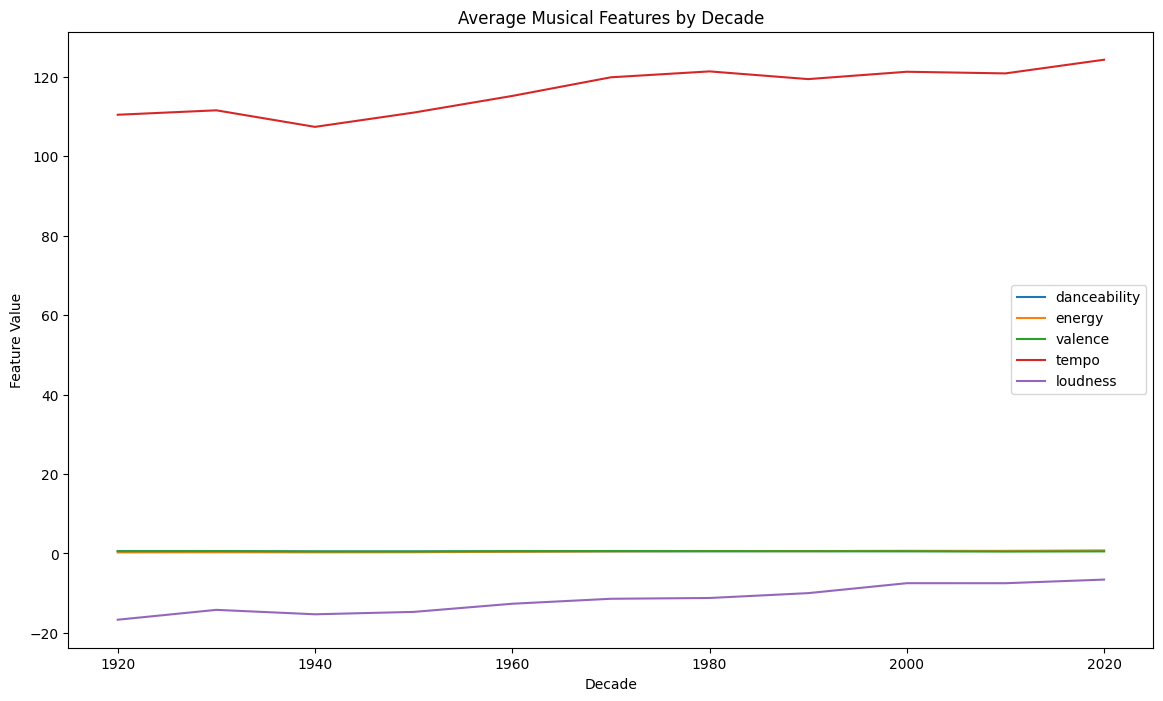

In [3]:
# Create a new DataFrame for decade analysis
decade_data = data.copy()
decade_data['decade'] = (decade_data['year'] // 10) * 10

# Grouping data by decade and calculating mean for numeric columns only
numeric_cols = ['valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']
decade_grouped = decade_data.groupby('decade')[numeric_cols].mean().reset_index()

# Plotting average features by decade
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness']
plt.figure(figsize=(14, 8))
for feature in features:
    sns.lineplot(x='decade', y=feature, data=decade_grouped, label=feature)
plt.title('Average Musical Features by Decade')
plt.xlabel('Decade')
plt.ylabel('Feature Value')
plt.legend()
plt.show()


## Creating Radar Chart for Feature Comparison

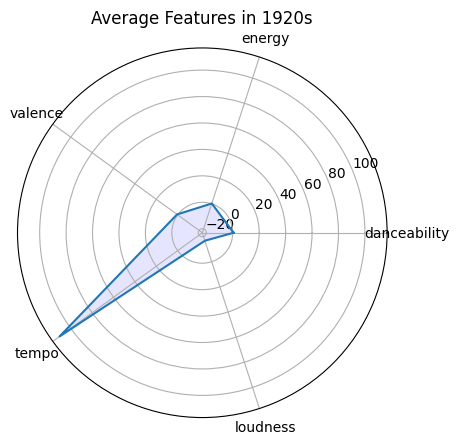

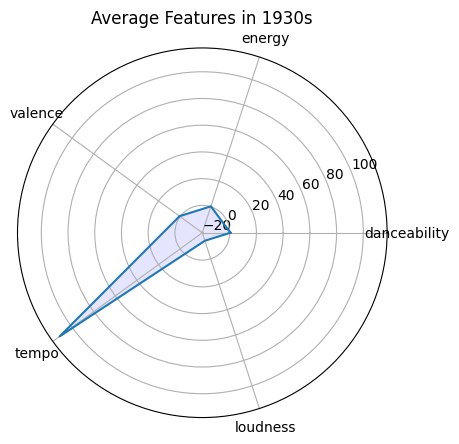

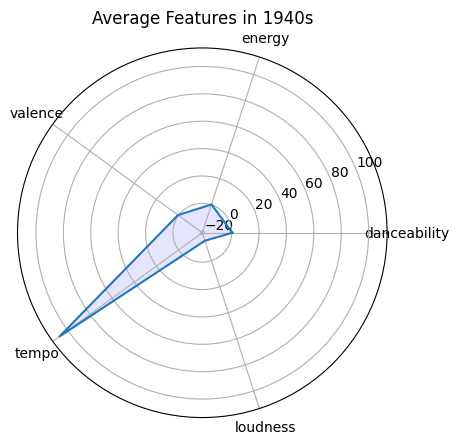

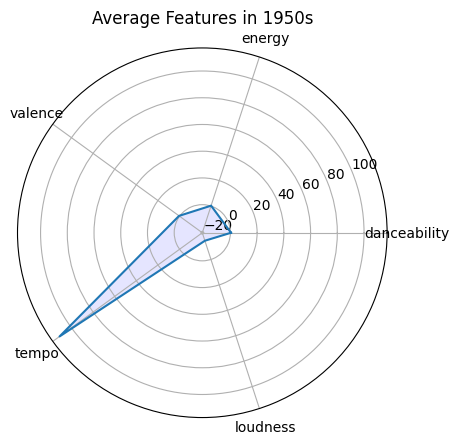

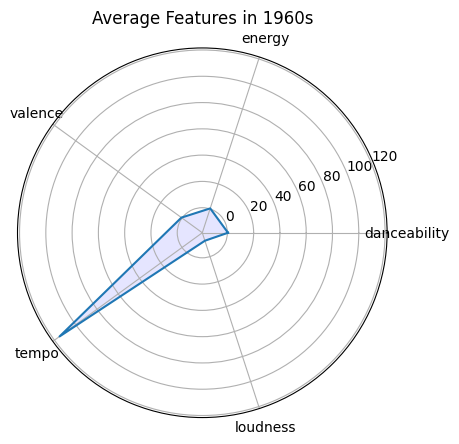

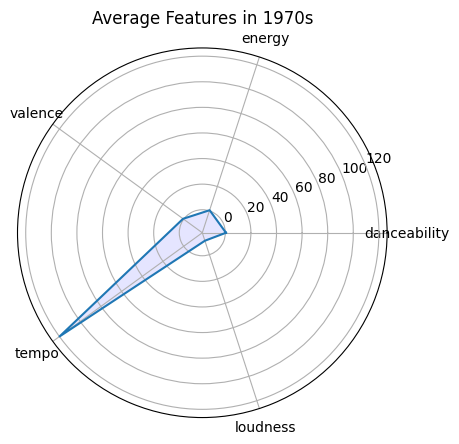

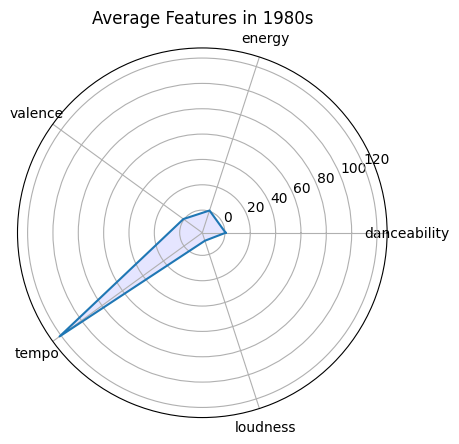

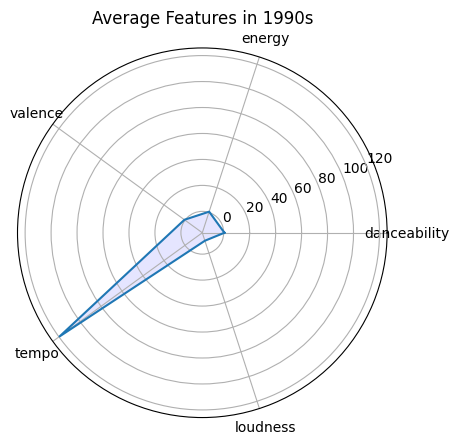

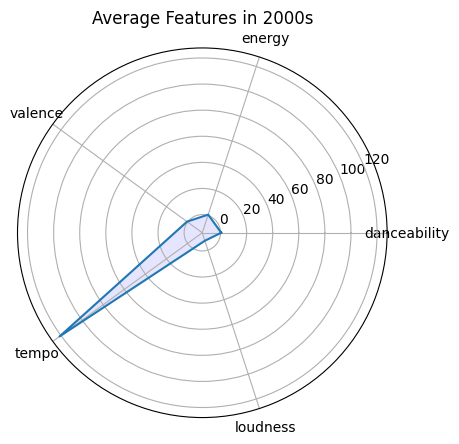

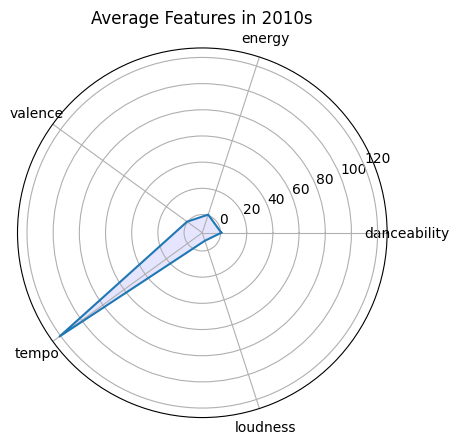

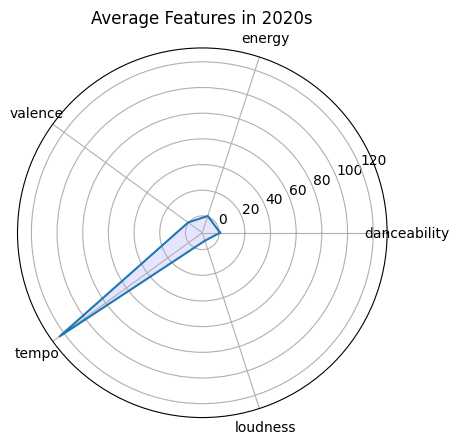

In [4]:
from math import pi

# Function to create radar chart
def create_radar_chart(df, features, title):
    categories = list(features)
    N = len(categories)
    
    values = df[features].mean().tolist()
    values += values[:1]
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)
    
    ax.plot(angles, values)
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(title)
    plt.show()

# Creating radar charts for each decade
decades = decade_grouped['decade'].unique()
for decade in decades:
    df = decade_data[decade_data['decade'] == decade]
    create_radar_chart(df, features, f'Average Features in {decade}s')


## Genre Analysis

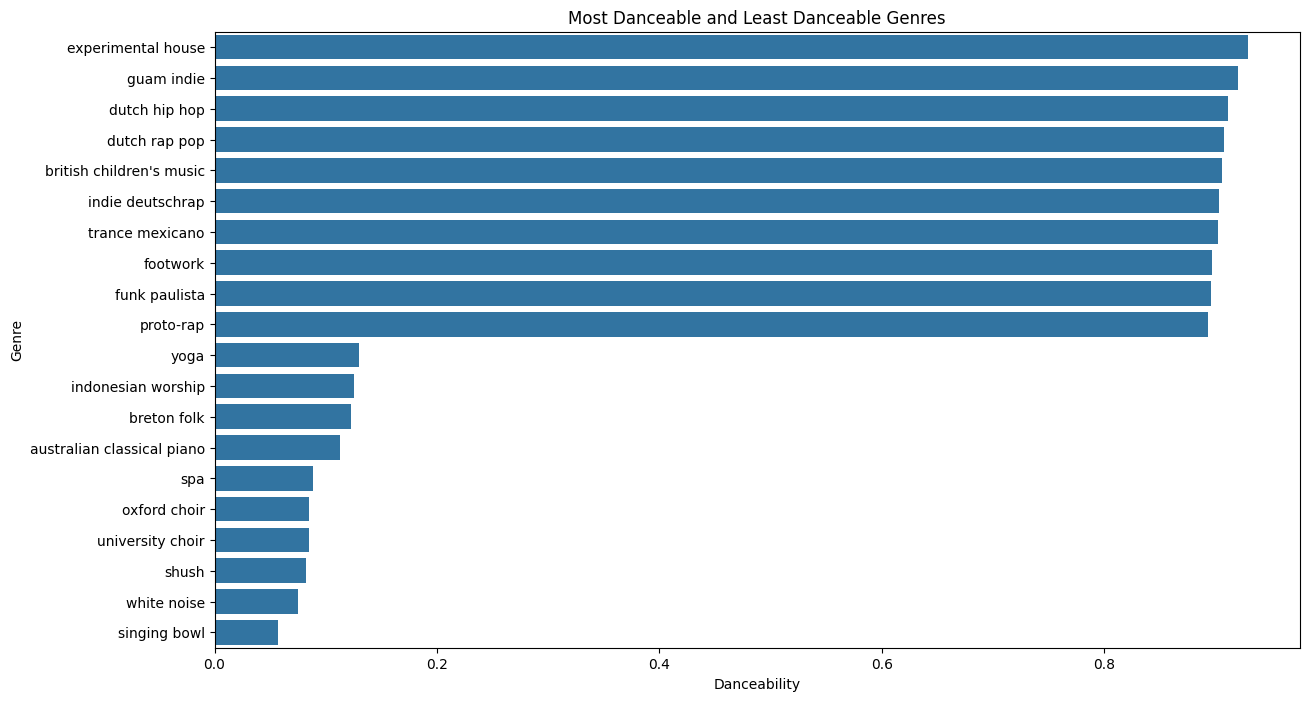

In [5]:
# Grouping data by genre and calculating mean for numeric columns only
numeric_cols_genre = genre_data.select_dtypes(include=[np.number]).columns.tolist()
genre_grouped = genre_data.groupby('genres')[numeric_cols_genre].mean().reset_index()

# Sorting genres by danceability
sorted_genres = genre_grouped.sort_values('danceability', ascending=False)

# Selecting the top 10 most danceable and top 10 least danceable genres
top_danceable_genres = sorted_genres.head(10)
least_danceable_genres = sorted_genres.tail(10)

# Combining the selected genres for plotting
selected_genres = pd.concat([top_danceable_genres, least_danceable_genres])

# Plotting average danceability for selected genres
plt.figure(figsize=(14, 8))
sns.barplot(x='danceability', y='genres', data=selected_genres)
plt.title('Most Danceable and Least Danceable Genres')
plt.xlabel('Danceability')
plt.ylabel('Genre')
plt.show()


## Danceability Analysis

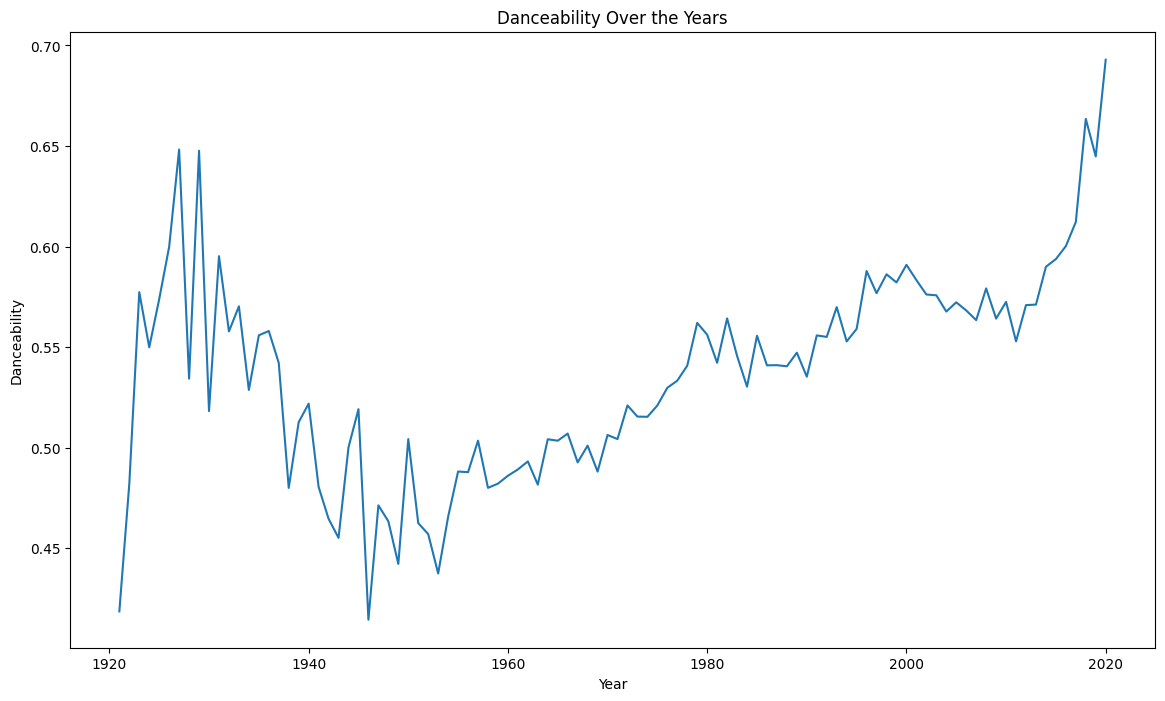

In [6]:
# Plotting danceability over the years
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='danceability', data=year_data)
plt.title('Danceability Over the Years')
plt.xlabel('Year')
plt.ylabel('Danceability')
plt.show()


## Statistical Analysis

In [7]:
from scipy.stats import ttest_ind

# Comparing danceability between two decades
decade_80s = decade_data[decade_data['decade'] == 1980]['danceability']
decade_90s = decade_data[decade_data['decade'] == 1990]['danceability']

t_stat, p_val = ttest_ind(decade_80s, decade_90s)
print(f'T-test between 80s and 90s danceability: t-statistic = {t_stat}, p-value = {p_val}')


T-test between 80s and 90s danceability: t-statistic = -10.860187713408381, p-value = 1.9494587262368406e-27


## Team Contributions for Part 2

- Data Collection and Processing: Logan Natysin
- Initial Analysis and Visualization: 
- Genre Analysis:
- Danceability Analysis: 
- Documentation and Report Writing: 

## Initial Findings

1. ?
2. ?
3. 

## Next Steps

For the next phase of our project, we plan to:
1. Incorporate more detailed genre analysis
2. Add sentiment analysis of song lyrics
3. Create interactive visualizations
4. Perform statistical tests to validate our findings